In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("honeyproduction.csv")

print(df.head())


  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [8]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
X = prod_per_year["year"]
y = prod_per_year["totalprod"]
X = X.values.reshape(-1, 1)
print(X)



[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


In [9]:
regr = linear_model.LinearRegression()
regr.fit(X,y)
y_predict = regr.predict(X)
print(regr.coef_[0])
print(regr.intercept_)


-88303.18915238194
181208083.1073298


In [12]:
X_future = np.array(range(2013, 2051))
X_future = X_future.reshape(-1, 1)
print("X: ", X_future)
future_predict = regr.predict(X_future)
print("y: ", y_predict)


X:  [[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]
 [2026]
 [2027]
 [2028]
 [2029]
 [2030]
 [2031]
 [2032]
 [2033]
 [2034]
 [2035]
 [2036]
 [2037]
 [2038]
 [2039]
 [2040]
 [2041]
 [2042]
 [2043]
 [2044]
 [2045]
 [2046]
 [2047]
 [2048]
 [2049]
 [2050]]
y:  [4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934684 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


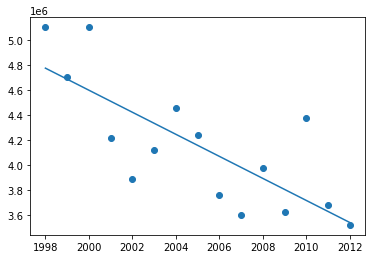

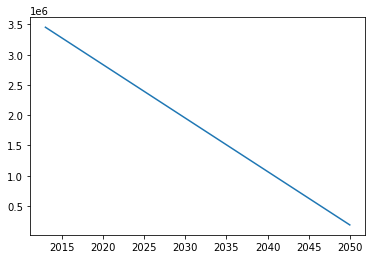

In [13]:


plt.plot(X, y_predict)
plt.scatter(X, y)
plt.show()
plt.plot(X_future, future_predict)
plt.show()